In [1]:
import os
import sys
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cv2

In [2]:
class ImageHeader:
    def __init__(self, img, df):
        self.image_size = (img.shape[0], img.shape[1])

In [3]:
def load_image_data(folder_id: int, image_id: int):
    file_name = './data/' + str(folder_id) + '/SimpleTest/' + str(image_id)
    
    if not os.path.isfile(file_name + '.png'):
        print("Image not exits")
        return None
    
    if not os.path.isfile(file_name + '.csv'):
        print("Data not exits")
        return None
    
    img = cv2.imread(file_name + '.png', cv2.IMREAD_GRAYSCALE)
    
    df = pd.read_csv(file_name + '.csv')
    
    return (img, df, ImageHeader(img, df))

In [4]:
show_counter = 0
    
def save_image(img, imageHeader=None, resize=True):
    global show_counter
    show_counter += 1
    number_as_str = str(show_counter)
    while len(number_as_str) < 3:
        number_as_str = '0' + number_as_str
    file_name = 'show_' + number_as_str + '.png'
    
    if imageHeader != None:
        if resize:
            img = img.copy()
            img.shape = imageHeader.image_size
    
    if os.path.exists(file_name):
        os.remove(file_name)
    
    return cv2.imwrite(file_name, img)

In [5]:
#(img, df, imageHeader) = load_image_data(7554, 10)
(img, df, imageHeader) = load_image_data(7557, 12)

img.shape

(925, 1381)

In [6]:
df

,X,Y,Pressure,TiltX,TiltY,Time
0,691.87296454556,584.284559,0.750240,3369.0,390.0,00:03.2521725
1,688.502598452477,584.442545,0.764889,3369.0,390.0,00:03.2679174
2,681.340570504677,584.705855,0.729732,3369.0,390.0,00:03.2834263
3,680.761288832429,584.811179,0.766354,3369.0,390.0,00:03.2990407
4,680.761288832429,584.811179,0.797848,3369.0,390.0,00:03.3147154
...,...,...,...,...,...,...
155,697.349809446818,646.373022,0.690669,2562.0,838.0,00:08.5764009
156,695.927936251299,647.636910,0.662104,2562.0,838.0,00:08.5918910
157,689.292528005543,652.481811,0.242664,2562.0,838.0,00:08.5918910
158,Time Elapsed till drawing started: 00:03.2365550,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns = map(lambda x: x.replace(" ", ""), df.columns.tolist())

In [8]:
last_message1 = df.iloc[-2]['X']
last_message2 = df.iloc[-1]['X']

df = df.iloc[:-2].copy()

print(last_message1)
print(last_message2)

Time Elapsed till drawing started: 00:03.2365550
Time Elapsed till drawing submit: 00:09.7235576


In [9]:
number_columns = list(filter(lambda x: x != 'Time', df.columns.tolist()))

last_value = 0
def to_float(x):
    global last_value
    try:
        x = float(x)
        last_value = x
    except:
        x = last_value
    return x

for column in number_columns:
    last_value = 0
    df[column] = df[column].apply(to_float)

df

,X,Y,Pressure,TiltX,TiltY,Time
0,691.872965,584.284559,0.750240,3369.0,390.0,00:03.2521725
1,688.502598,584.442545,0.764889,3369.0,390.0,00:03.2679174
2,681.340571,584.705855,0.729732,3369.0,390.0,00:03.2834263
3,680.761289,584.811179,0.766354,3369.0,390.0,00:03.2990407
4,680.761289,584.811179,0.797848,3369.0,390.0,00:03.3147154
...,...,...,...,...,...,...
153,703.089964,640.948839,0.713375,2562.0,838.0,00:08.5450087
154,701.615429,642.476036,0.708247,2562.0,838.0,00:08.5764009
155,697.349809,646.373022,0.690669,2562.0,838.0,00:08.5764009
156,695.927936,647.636910,0.662104,2562.0,838.0,00:08.5918910


In [10]:
last_value = 0
def time_to_number(x):
    global last_value
    if not x:
        return last_value
    
    if type(x) == float:
        return x
    
    (m, s) = x.split(':')
    m = float(m)
    s = float(s)
    return m * 60 + s

df['Time'] = df['Time'].apply(time_to_number)
df

,X,Y,Pressure,TiltX,TiltY,Time
0,691.872965,584.284559,0.750240,3369.0,390.0,3.252172
1,688.502598,584.442545,0.764889,3369.0,390.0,3.267917
2,681.340571,584.705855,0.729732,3369.0,390.0,3.283426
3,680.761289,584.811179,0.766354,3369.0,390.0,3.299041
4,680.761289,584.811179,0.797848,3369.0,390.0,3.314715
...,...,...,...,...,...,...
153,703.089964,640.948839,0.713375,2562.0,838.0,8.545009
154,701.615429,642.476036,0.708247,2562.0,838.0,8.576401
155,697.349809,646.373022,0.690669,2562.0,838.0,8.576401
156,695.927936,647.636910,0.662104,2562.0,838.0,8.591891


In [11]:
df.dtypes

X           float64
Y           float64
Pressure    float64
TiltX       float64
TiltY       float64
Time        float64
dtype: object

In [12]:
def add_column_diff(column):
    global df
    now = np.array(df[column].tolist() + [df[column][len(df[column])-1]])
    before = np.array([0] + df[column].tolist())
    df[column + 'Diff'] = (now - before)[1:]
    
    fig = plt.figure()
    fig.set_size_inches(18, 6)
    
    ax = fig.add_subplot(1, 2, 1)
    ax.set_title(column)
    ax.plot(df[column])
    
    ax = fig.add_subplot(1, 2, 2)
    ax.set_title(column + ' Diff')
    ax.plot(df[column + 'Diff'])

    plt.show()

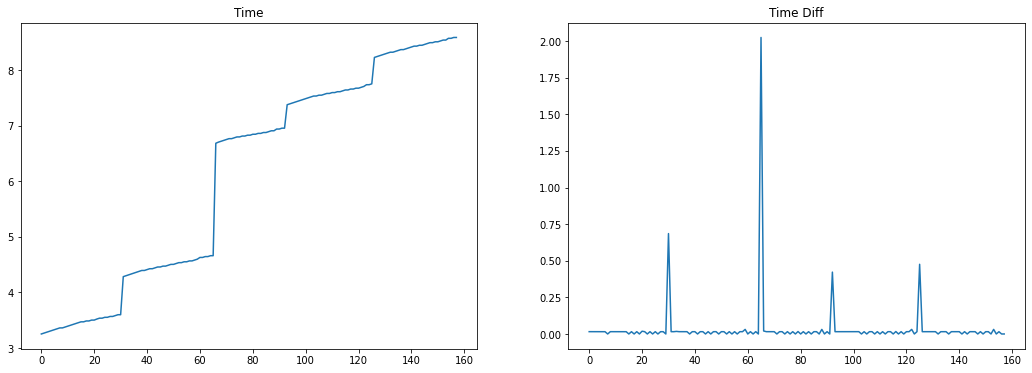

In [13]:
add_column_diff('Time')

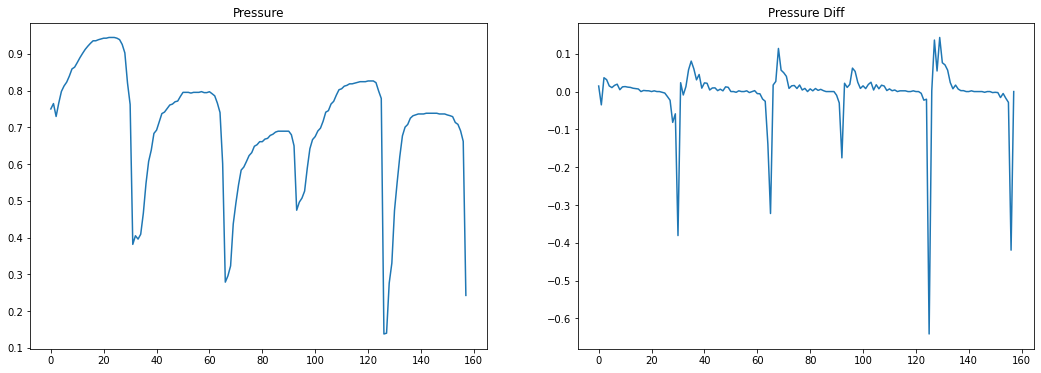

In [14]:
add_column_diff('Pressure')

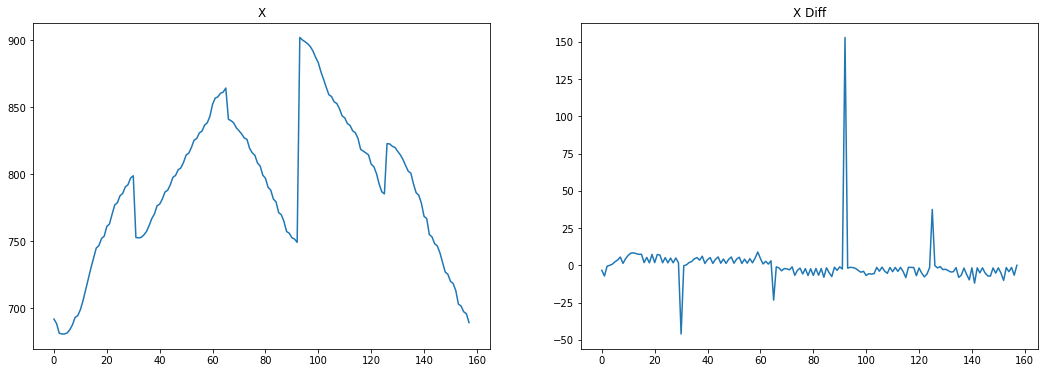

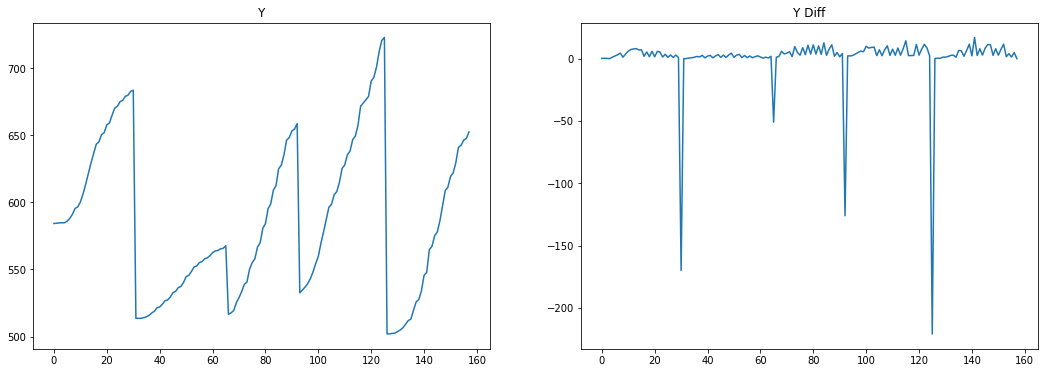

In [15]:
add_column_diff('X')
add_column_diff('Y')

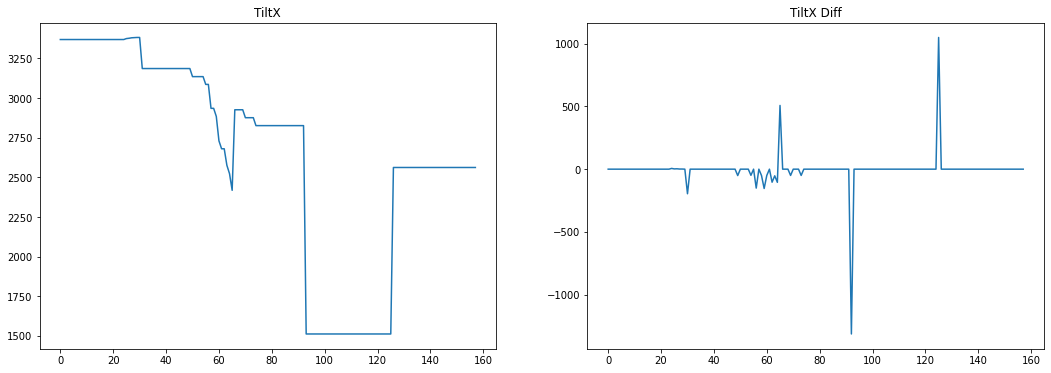

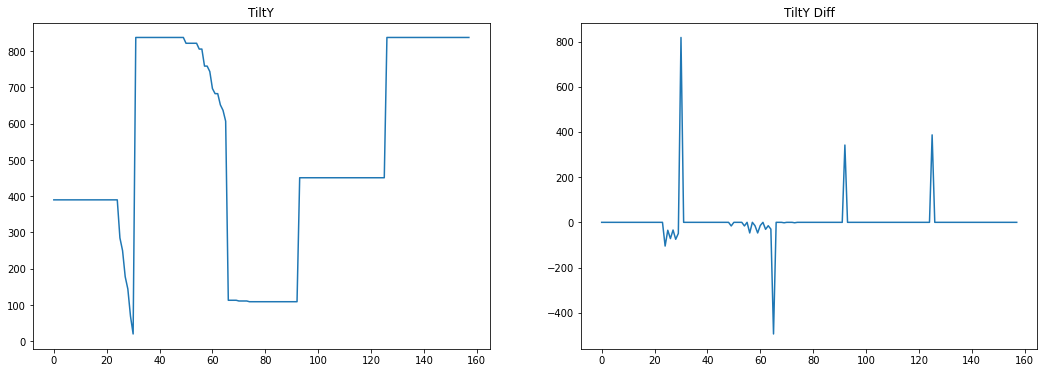

In [16]:
add_column_diff('TiltX')
add_column_diff('TiltY')

In [17]:
vector_img = img.copy()
vector_img.shape = (vector_img.shape[0] * vector_img.shape[1])
len(vector_img)

1277425

In [18]:
i = 0
for pixel in vector_img:
    if pixel < 255/2:
        vector_img[i] = 0
    else:
        vector_img[i] = 255
    
    i += 1

In [19]:
save_image(vector_img, imageHeader)

True

In [20]:
img_show = img.copy()
img_show = img_show[100:-100, 100:-100]

save_image(img_show)

True

In [21]:
img_show = img.copy()

for x in np.arange(int(df['X'].min()), int(df['X'].max()) + 1, 1):
    for y in np.arange(int(df['Y'].min()), int(df['Y'].max()) + 1, 1):
        img_show[y,x] = 255
save_image(img_show)
print(int(df['Y'].max()), " ", int(df['X'].max()))
img_show.shape

722   902


(925, 1381)

In [22]:
drawed_img = img.copy()

bound_x = [int(df['X'].min()), int(df['X'].max())]
if bound_x[1] < df['X'].max():
    bound_x[1] += 1

bound_y = [int(df['Y'].min()), int(df['Y'].max())]
if bound_y[1] < df['Y'].max():
    bound_y[1] += 1

drawed_img = drawed_img[bound_y[0]:bound_y[1], bound_x[0]:bound_x[1]]

save_image(drawed_img)

True

In [23]:
drawed_img_backup = drawed_img

In [24]:
drawed_img = np.ndarray((drawed_img_backup.shape[0] + 2, drawed_img_backup.shape[1] + 2))
drawed_img[:, :] = 255
drawed_img[1:-1, 1:-1] = drawed_img_backup

drawed_img = drawed_img > 255/2
drawed_img = drawed_img * 255

save_image(drawed_img)

True

In [25]:
full_drawed_img = drawed_img.copy()

# Status
## Data
The image data saved in 'df' and all the types are float

## Image
The image saved in number of ways
img - The original image as grayscale
drawed_img - The image affter zoom

In [26]:
def save_trace_image(img):
    global show_counter
    show_counter += 1
    number_as_str = str(show_counter)
    while len(number_as_str) < 3:
        number_as_str = '0' + number_as_str
    file_name = 'show_' + number_as_str + '.png'
    
    rgb_img = np.ndarray((img.shape[0], img.shape[1], 3))
    
    rgb_img[:, :, :] = 0
    
    found = np.where(trace_img == 1)
    for i in range(len(found[0])):
        rgb_img[found[0][i],found[1][i], 0] = 255

    found = np.where(trace_img == 2)
    for i in range(len(found[0])):
        rgb_img[found[0][i],found[1][i], 2] = 255
    
    rgb_img[(rgb_img[:, :, 0] == 0) & (rgb_img[:, :, 1] == 0) & (rgb_img[:, :, 2] == 0)] = 255
    
    return cv2.imwrite(file_name, rgb_img)

In [27]:
trace_img = drawed_img.copy()
trace_img[drawed_img == 0] = 1

save_trace_image(trace_img)

True

In [28]:
# try 2
def red_spider(img):
    
    # color bounds
    img[[0,-1], :] = 2
    img[:, [0,-1]] = 2
    
    points = list()
    for x in range(img.shape[0]):
        points.append((x, 1))
        points.append((x, img.shape[1] - 2))

    for y in range(img.shape[1]):
        points.append((1, y))
        points.append((img.shape[0] - 2, y))
    
    steps = 0
    while len(points) > 0:
        (x,y) = points.pop()
        if img[x,y] == 0:
            steps += 1
            
            if steps % 10**5 == 0:
                 print(steps, len(points))
            
            img[x,y] = 2            
            for n in [0, 1, 2, 3, 5, 6, 7, 8]:
                dx = n % 3 - 1
                dy = int(n/3) - 1
                points.append((x+dx, y+dy))
        
    return img

In [29]:
# load
trace_img = drawed_img.copy()
trace_img[drawed_img == 0] = 1
trace_img[drawed_img == 255] = 0

trace_img = red_spider(trace_img)
save_trace_image(trace_img)

if (trace_img == 0).sum() == 0:
    print("Not exists open shapes")
else:
    print("Exists open shapes")


Exists open shapes
